In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, ClassicalRegister, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi 
from qiskit.extensions import UnitaryGate
from qiskit.extensions import HamiltonianGate
from qiskit.circuit.library import PhaseEstimation
from qiskit.algorithms import HamiltonianPhaseEstimation
 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = provider.get_backend('ibm_oslo')

# import basic plot tools
from qiskit.visualization import plot_histogram

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
U = [[0.99996903+0.00787076j, 0.99802205+0.06286485j,
        0.99996812+0.00798532j, 0.99587464+0.09073972j,
        0.9986941 +0.05108915j, 0.99997047+0.00768515j,
        0.99996168+0.00875469j, 0.99997207+0.00747443j],
       [0.99802205+0.06286485j, 0.99987397+0.01587616j,
        0.99997207+0.00747443j, 0.9986941 +0.05108915j,
        0.99587464+0.09073972j, 0.99996168+0.00875469j,
        0.99997047+0.00768515j, 0.99996812+0.00798532j],
       [0.99996812+0.00798532j, 0.99997207+0.00747443j,
        0.99495462+0.10032602j, 0.99996168+0.00875469j,
        0.99998034+0.00627083j, 0.9986941 +0.05108915j,
        0.99587464+0.09073972j, 0.99975576+0.02210043j],
       [0.99587464+0.09073972j, 0.9986941 +0.05108915j,
        0.99996168+0.00875469j, 0.99975649+0.02206712j,
        0.99975576+0.02210043j, 0.99997207+0.00747443j,
        0.99996812+0.00798532j, 0.99998034+0.00627083j],
       [0.9986941 +0.05108915j, 0.99587464+0.09073972j,
        0.99998034+0.00627083j, 0.99975576+0.02210043j,
        0.99988782+0.01497809j, 0.99996812+0.00798532j,
        0.99997207+0.00747443j, 0.99996168+0.00875469j],
       [0.99997047+0.00768515j, 0.99996168+0.00875469j,
        0.9986941 +0.05108915j, 0.99997207+0.00747443j,
        0.99996812+0.00798532j, 0.98484758+0.17342216j,
        0.99802205+0.06286485j, 0.99587464+0.09073972j],
       [0.99996168+0.00875469j, 0.99997047+0.00768515j,
        0.99587464+0.09073972j, 0.99996812+0.00798532j,
        0.99997207+0.00747443j, 0.99802205+0.06286485j,
        0.99225213+0.12424055j, 0.9986941 +0.05108915j],
       [0.99997207+0.00747443j, 0.99996812+0.00798532j,
        0.99975576+0.02210043j, 0.99998034+0.00627083j,
        0.99996168+0.00875469j, 0.99587464+0.09073972j,
        0.9986941 +0.05108915j, 0.99670535+0.08110762j]] #qi.Operator

In [3]:
H =    [[0.00125268, 0.01001185, 0.00127092, 0.01446157, 0.00813463,
        0.00122314, 0.00139337, 0.0011896 ],
       [0.01001185, 0.00252688, 0.0011896 , 0.00813463, 0.01446157,
        0.00139337, 0.00122314, 0.00127092],
       [0.00127092, 0.0011896 , 0.01599429, 0.00139337, 0.00099804,
        0.00813463, 0.01446157, 0.00351768],
       [0.01446157, 0.00813463, 0.00139337, 0.00351238, 0.00351768,
        0.0011896 , 0.00127092, 0.00099804],
       [0.00813463, 0.01446157, 0.00099804, 0.00351768, 0.00238393,
        0.00127092, 0.0011896 , 0.00139337],
       [0.00122314, 0.00139337, 0.00813463, 0.0011896 , 0.00127092,
        0.02774125, 0.01001185, 0.01446157],
       [0.00139337, 0.00122314, 0.01446157, 0.00127092, 0.0011896 ,
        0.01001185, 0.01982472, 0.00813463],
       [0.0011896 , 0.00127092, 0.00351768, 0.00099804, 0.00139337,
        0.01446157, 0.00813463, 0.01292287]]

In [4]:
U = HamiltonianGate(H,2*np.pi,label="CU")
print(U)

Instruction(name='hamiltonian', num_qubits=3, num_clbits=0, params=[array([[0.00125268+0.j, 0.01001185+0.j, 0.00127092+0.j, 0.01446157+0.j,
        0.00813463+0.j, 0.00122314+0.j, 0.00139337+0.j, 0.0011896 +0.j],
       [0.01001185+0.j, 0.00252688+0.j, 0.0011896 +0.j, 0.00813463+0.j,
        0.01446157+0.j, 0.00139337+0.j, 0.00122314+0.j, 0.00127092+0.j],
       [0.00127092+0.j, 0.0011896 +0.j, 0.01599429+0.j, 0.00139337+0.j,
        0.00099804+0.j, 0.00813463+0.j, 0.01446157+0.j, 0.00351768+0.j],
       [0.01446157+0.j, 0.00813463+0.j, 0.00139337+0.j, 0.00351238+0.j,
        0.00351768+0.j, 0.0011896 +0.j, 0.00127092+0.j, 0.00099804+0.j],
       [0.00813463+0.j, 0.01446157+0.j, 0.00099804+0.j, 0.00351768+0.j,
        0.00238393+0.j, 0.00127092+0.j, 0.0011896 +0.j, 0.00139337+0.j],
       [0.00122314+0.j, 0.00139337+0.j, 0.00813463+0.j, 0.0011896 +0.j,
        0.00127092+0.j, 0.02774125+0.j, 0.01001185+0.j, 0.01446157+0.j],
       [0.00139337+0.j, 0.00122314+0.j, 0.01446157+0.j, 0.0012

In [5]:
#HamiltonianPhaseEstimation(U)

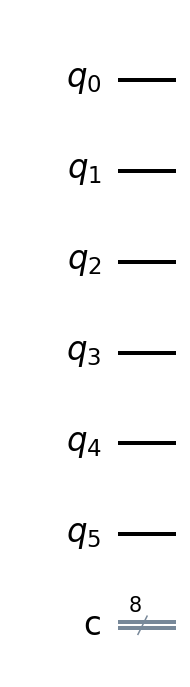

In [6]:
qpe = QuantumCircuit(6, 8)
qpe.draw(scale=2)

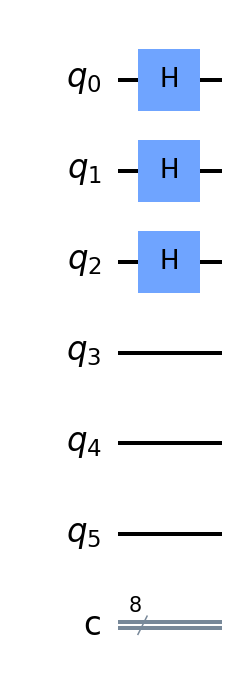

In [7]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw(scale=2)

In [8]:
#PhaseEstimation(3,U)

In [9]:
CU = U.control(label="control")
print(CU)

Instruction(name='chamiltonian', num_qubits=4, num_clbits=0, params=[array([[0.00125268+0.j, 0.01001185+0.j, 0.00127092+0.j, 0.01446157+0.j,
        0.00813463+0.j, 0.00122314+0.j, 0.00139337+0.j, 0.0011896 +0.j],
       [0.01001185+0.j, 0.00252688+0.j, 0.0011896 +0.j, 0.00813463+0.j,
        0.01446157+0.j, 0.00139337+0.j, 0.00122314+0.j, 0.00127092+0.j],
       [0.00127092+0.j, 0.0011896 +0.j, 0.01599429+0.j, 0.00139337+0.j,
        0.00099804+0.j, 0.00813463+0.j, 0.01446157+0.j, 0.00351768+0.j],
       [0.01446157+0.j, 0.00813463+0.j, 0.00139337+0.j, 0.00351238+0.j,
        0.00351768+0.j, 0.0011896 +0.j, 0.00127092+0.j, 0.00099804+0.j],
       [0.00813463+0.j, 0.01446157+0.j, 0.00099804+0.j, 0.00351768+0.j,
        0.00238393+0.j, 0.00127092+0.j, 0.0011896 +0.j, 0.00139337+0.j],
       [0.00122314+0.j, 0.00139337+0.j, 0.00813463+0.j, 0.0011896 +0.j,
        0.00127092+0.j, 0.02774125+0.j, 0.01001185+0.j, 0.01446157+0.j],
       [0.00139337+0.j, 0.00122314+0.j, 0.01446157+0.j, 0.001

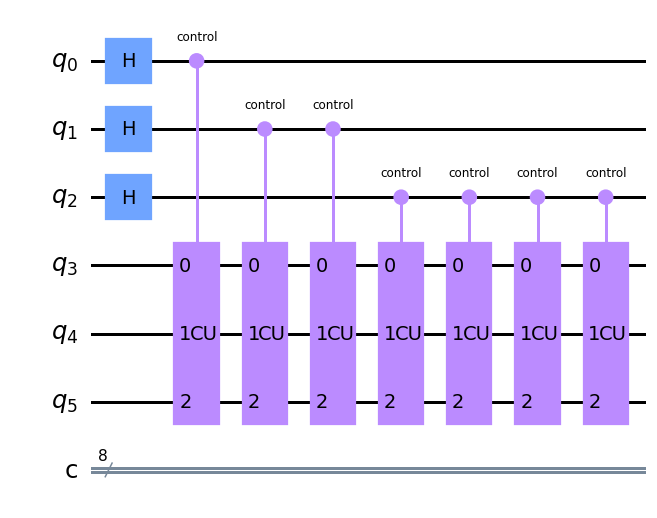

In [10]:
repetitions = 1
#CU = U#.to_gate().control(1)
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.append(CU,[counting_qubit,3,4,5])
        #qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2
qpe.draw(scale=1.5)

In [11]:
#straight from the tutorial:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [12]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

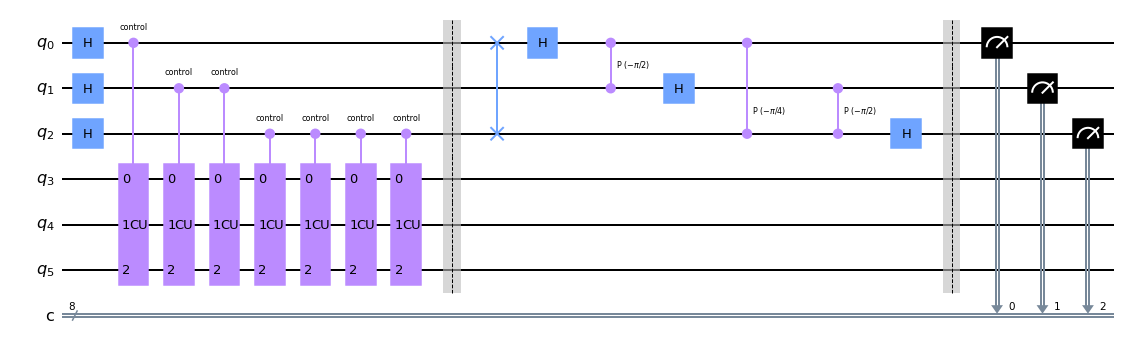

In [13]:
qpe.draw()

/tmp/ipykernel_178/1941479506.py:5: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  results = backend.run(qobj).result()


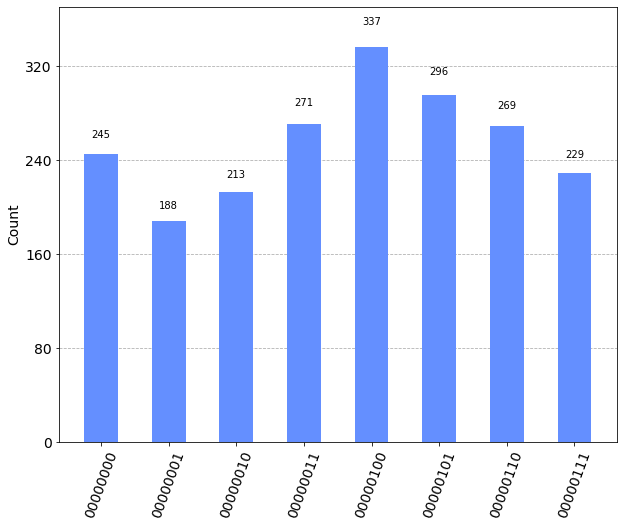

In [14]:
# aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, backend)
qobj = assemble(t_qpe, shots=shots)
results = backend.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer,figsize=(10,8))